## Naive Bayes to predict approval of project

## Loading Data

In [1]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows = 100000)

<h2>Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# Splitting into predictors and target class
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [4]:
# Splitting into train test and Cv sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train)
X_train.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
84054,ny,mrs,grades_3_5,1,math_science,appliedsciences,the majority students come low income poverty ...,719.93


<h2>Encoding essay, and project_title</h2>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [7]:
vectorizer = CountVectorizer(ngram_range = (1,4), min_df = 10, max_features = 5000)
vectorizer.fit(X_train['essay'])

CountVectorizer(max_features=5000, min_df=10, ngram_range=(1, 4))

In [8]:
X_train_essay_bow = vectorizer.transform(X_train['essay'])
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [9]:
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

(44890, 5000) (44890,)
(22110, 5000) (22110,)
(33000, 5000) (33000,)


In [10]:
vectorizer_tfidf = TfidfVectorizer(ngram_range = (1,4), min_df = 10, max_features = 5000)
vectorizer_tfidf.fit(X_train['essay'])

TfidfVectorizer(max_features=5000, min_df=10, ngram_range=(1, 4))

In [11]:
X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'])
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

In [12]:
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

(44890, 5000) (44890,)
(22110, 5000) (22110,)
(33000, 5000) (33000,)


<h2>Encoding numerical, categorical features</h2>

In [14]:
# categorical features
# - teacher_prefix
# - project_grade_category
# - school_state
# - clean_categories
# - clean_subcategories
# numerical features
# - price
# - teacher_number_of_previously_posted_projects

#### Encoding teacher_prefix

In [15]:
X_train['teacher_prefix'].value_counts()

mrs        23536
ms         16014
mr          4357
teacher      979
dr             4
Name: teacher_prefix, dtype: int64

In [16]:
#Bow encoding of teacher_prefix feature
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

CountVectorizer()

In [17]:
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(44890, 5) (44890,)
(22110, 5) (22110,)
(33000, 5) (33000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### Encoding project_grade_category feature

In [18]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

CountVectorizer()

In [19]:
X_train_project_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)


print(X_train_project_grade_ohe.shape, y_train.shape)
print(X_cv_project_grade_ohe.shape, y_cv.shape)
print(X_test_project_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(44890, 4) (44890,)
(22110, 4) (22110,)
(33000, 4) (33000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### Encoding school_state feature

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

CountVectorizer()

In [21]:
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)


print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(44890, 51) (44890,)
(22110, 51) (22110,)
(33000, 51) (33000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


#### Encoding clean_categories feature

In [22]:
X_train['clean_categories'].value_counts()

literacy_language                       9664
math_science                            7050
literacy_language math_science          6002
health_sports                           4416
music_arts                              2181
specialneeds                            1705
literacy_language specialneeds          1606
appliedlearning                         1485
math_science literacy_language           926
appliedlearning literacy_language        880
history_civics                           749
math_science specialneeds                740
literacy_language music_arts             737
math_science music_arts                  684
history_civics literacy_language         623
appliedlearning specialneeds             608
health_sports specialneeds               570
warmth care_hunger                       473
math_science appliedlearning             462
appliedlearning math_science             442
health_sports literacy_language          336
literacy_language history_civics         319
appliedlea

In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

CountVectorizer()

In [24]:
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)


print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(44890, 9) (44890,)
(22110, 9) (22110,)
(33000, 9) (33000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


#### Encoding clean_subcategories feature

In [25]:
X_train['clean_subcategories'].value_counts()

literacy                             3840
literacy mathematics                 3448
literature_writing mathematics       2410
literacy literature_writing          2266
mathematics                          2219
                                     ... 
financialliteracy other                 1
socialsciences teamsports               1
gym_fitness socialsciences              1
gym_fitness history_geography           1
extracurricular financialliteracy       1
Name: clean_subcategories, Length: 374, dtype: int64

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

CountVectorizer()

In [27]:
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_categories'].values)


print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

(44890, 30) (44890,)
(22110, 30) (22110,)
(33000, 30) (33000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


#### Encoding price

In [28]:
from sklearn.preprocessing import Normalizer

In [29]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

Normalizer()

In [30]:
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


#### Encoding teacher_number_of_previously_posted_projects

In [31]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

Normalizer()

In [32]:
X_train_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print(X_train_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_previously_posted_projects_norm.shape, y_test.shape)

(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


<h2>Appling NB on different kind of featurization</h2>


#### Concatenating preprocessed features to form Set1 and Set2 as stated in the instructions

In [34]:
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_essay_bow, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_project_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe, X_train_price_norm, X_train_previously_posted_projects_norm)).tocsr()
X_cr_set1 = hstack((X_cv_essay_bow, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_project_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_previously_posted_projects_norm)).tocsr()
X_te_set1 = hstack((X_test_essay_bow, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_project_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe, X_test_price_norm, X_test_previously_posted_projects_norm)).tocsr()

print("SET1 shape")
print(X_tr_set1.shape, y_train.shape)
print(X_cr_set1.shape, y_cv.shape)
print(X_te_set1.shape, y_test.shape)
print("-"*100)


X_tr_set2 = hstack((X_train_essay_tfidf, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_project_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe, X_train_price_norm,X_train_previously_posted_projects_norm)).tocsr()
X_cr_set2 = hstack((X_cv_essay_tfidf, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_project_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_previously_posted_projects_norm)).tocsr()
X_te_set2 = hstack((X_test_essay_tfidf, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_project_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe, X_test_price_norm, X_test_previously_posted_projects_norm)).tocsr()

print("SET2 shape")
print(X_tr_set2.shape, y_train.shape)
print(X_cr_set2.shape, y_cv.shape)
print(X_te_set2.shape, y_test.shape)

SET1 shape
(44890, 5101) (44890,)
(22110, 5101) (22110,)
(33000, 5101) (33000,)
----------------------------------------------------------------------------------------------------
SET2 shape
(44890, 5101) (44890,)
(22110, 5101) (22110,)
(33000, 5101) (33000,)


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.naive_bayes import MultinomialNB


##### Applying NB on set1

<function matplotlib.pyplot.show(*args, **kw)>

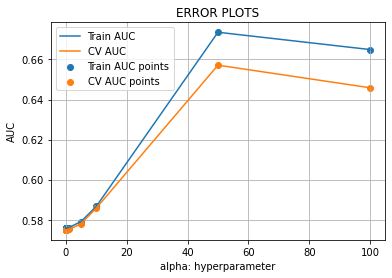

In [36]:
train_auc = []
cv_auc = []
y_pred_final_train = []
y_pred_final_cv = []

alpha_list = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha_list:
    classifier = MultinomialNB(alpha = i, class_prior = None)
    classifier.fit(X_tr_set1,y_train)

    y_train_pred = classifier.predict_proba(X_tr_set1)
    y_cv_pred = classifier.predict_proba(X_cr_set1)
    
    for i in range(y_train_pred.shape[0]):
        y_pred_final_train.append(max(y_train_pred[i][0],y_train_pred[i][1]))
        
    for i in range(y_cv_pred.shape[0]):
        y_pred_final_cv.append(max(y_cv_pred[i][0],y_cv_pred[i][1]))
    
    train_auc.append(roc_auc_score(y_train,np.array(y_pred_final_train)))
    cv_auc.append(roc_auc_score(y_cv, np.array(y_pred_final_cv)))

    y_pred_final_train = []
    y_pred_final_cv = []

#Without taking log of alpha values
    
plt.plot(alpha_list, train_auc, label='Train AUC')
plt.plot(alpha_list, cv_auc, label='CV AUC')

plt.scatter(alpha_list, train_auc, label='Train AUC points')
plt.scatter(alpha_list, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

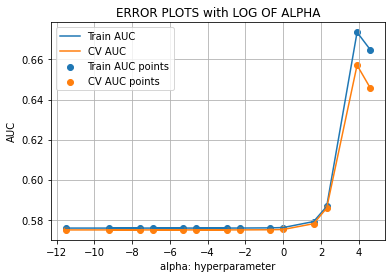

In [37]:
train_auc = []
cv_auc = []
y_pred_final_train = []
y_pred_final_cv = []

alpha_list = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha_list:
    classifier = MultinomialNB(alpha = i, class_prior = None)
    classifier.fit(X_tr_set1,y_train)

    y_train_pred = classifier.predict_proba(X_tr_set1)
    y_cv_pred = classifier.predict_proba(X_cr_set1)
    
    for i in range(y_train_pred.shape[0]):
        y_pred_final_train.append(max(y_train_pred[i][0],y_train_pred[i][1]))
        
    for i in range(y_cv_pred.shape[0]):
        y_pred_final_cv.append(max(y_cv_pred[i][0],y_cv_pred[i][1]))
    
    train_auc.append(roc_auc_score(y_train,np.array(y_pred_final_train)))
    cv_auc.append(roc_auc_score(y_cv, np.array(y_pred_final_cv)))

    y_pred_final_train = []
    y_pred_final_cv = []

# Taking log of alpha values
    
log_alpha = [math.log(i) for i in alpha_list]    

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with LOG OF ALPHA")
plt.grid()
plt.show


In [38]:
# From the AUC plots the alpha value that corresponds to maxmimum value of AUC on cv data and the least gap between train
# and cv AUC values is 50

best_alpha = 50

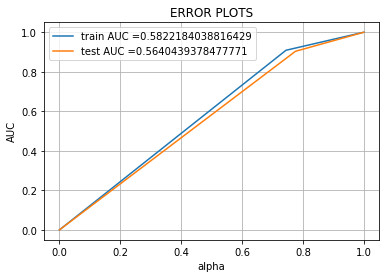

In [39]:
from sklearn.metrics import roc_curve, auc


clf = MultinomialNB(alpha = best_alpha, class_prior = None)
clf.fit(X_tr_set1, y_train)


y_train_pred = clf.predict(X_tr_set1)    
y_test_pred = clf.predict(X_te_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [40]:
y_test.shape, y_test_pred.shape

((33000,), (33000,))

Confusion matrix in heatmaps


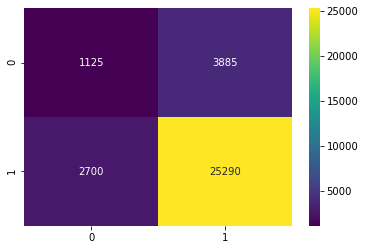

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion matrix in heatmaps")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='viridis')

#### Applying NB on SET2

<function matplotlib.pyplot.show(*args, **kw)>

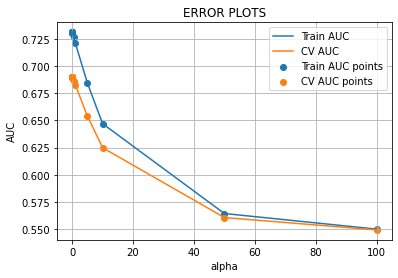

In [42]:
train_auc = []      ### using tfidf set
cv_auc = []
y_pred_final_train = []
y_pred_final_cv = []

alpha_list = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha_list:
    classifier = MultinomialNB(alpha = i, class_prior = None)
    classifier.fit(X_tr_set2,y_train)

    y_train_pred = classifier.predict_proba(X_tr_set2)
    y_cv_pred = classifier.predict_proba(X_cr_set2)
    
    for i in range(y_train_pred.shape[0]):
        y_pred_final_train.append(max(y_train_pred[i][0],y_train_pred[i][1]))
        
    for i in range(y_cv_pred.shape[0]):
        y_pred_final_cv.append(max(y_cv_pred[i][0],y_cv_pred[i][1]))
    
    train_auc.append(roc_auc_score(y_train,np.array(y_pred_final_train)))
    cv_auc.append(roc_auc_score(y_cv, np.array(y_pred_final_cv)))

    y_pred_final_train = []
    y_pred_final_cv = []

#Without taking log of alpha values
    
plt.plot(alpha_list, train_auc, label='Train AUC')
plt.plot(alpha_list, cv_auc, label='CV AUC')

plt.scatter(alpha_list, train_auc, label='Train AUC points')
plt.scatter(alpha_list, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

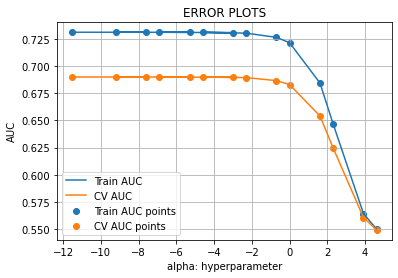

In [43]:
train_auc = []
cv_auc = []
y_pred_final_train = []
y_pred_final_cv = []

alpha_list = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in alpha_list:
    classifier = MultinomialNB(alpha = i, class_prior = None)
    classifier.fit(X_tr_set2,y_train)

    y_train_pred = classifier.predict_proba(X_tr_set2)
    y_cv_pred = classifier.predict_proba(X_cr_set2)
    
    for i in range(y_train_pred.shape[0]):
        y_pred_final_train.append(max(y_train_pred[i][0],y_train_pred[i][1]))
        
    for i in range(y_cv_pred.shape[0]):
        y_pred_final_cv.append(max(y_cv_pred[i][0],y_cv_pred[i][1]))
    
    train_auc.append(roc_auc_score(y_train,np.array(y_pred_final_train)))
    cv_auc.append(roc_auc_score(y_cv, np.array(y_pred_final_cv)))

    y_pred_final_train = []
    y_pred_final_cv = []

# Taking log of alpha values
    
log_alpha = [math.log(i) for i in alpha_list]    

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show


In [50]:
## the best alpha value corresponding to maximum AUC
best_alpha = 0.00001

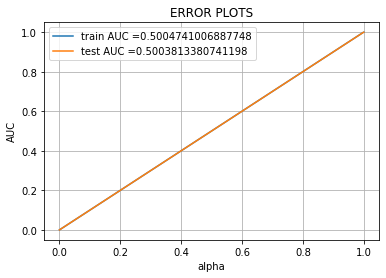

In [52]:
from sklearn.metrics import roc_curve, auc


clf = MultinomialNB(alpha = best_alpha, class_prior = None)
clf.fit(X_tr_set2, y_train)


y_train_pred = clf.predict(X_tr_set2)    
y_test_pred = clf.predict(X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Confusion matrix in heatmaps


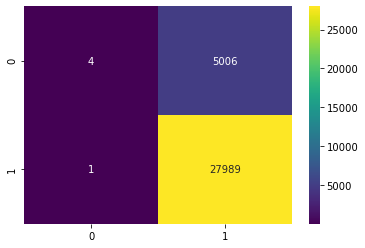

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion matrix in heatmaps")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='viridis')

In [58]:
features_df = pd.DataFrame({'Negative':(clf.feature_log_prob_)[0].T, 'Positive':(clf.feature_log_prob_)[1].T, 'Features':l})

<h1>3. Summary</h1>


In [4]:
import pandas
table = {'Vectorizer':['BOW','TFIDF'],
                'Model':['Naive Bayes','Naive Bayes'],
                'Hyper Parameter':[50,0.00001],
                'AUC':[0.56404,0.50038]}
summary = pandas.DataFrame(table,columns = ['Vectorizer','Model','Hyper Parameter','AUC'])
print(summary)

  Vectorizer        Model  Hyper Parameter      AUC
0        BOW  Naive Bayes         50.00000  0.56404
1      TFIDF  Naive Bayes          0.00001  0.50038


## THE END